In [315]:
#importing modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [316]:
#Assigning the csv path to a variable
csv_path = r"//home//mo//Documents//UNC//project1//Project1-Group//Boston2019.csv"

#useing pandas to read the file
df_read = pd.read_csv(csv_path, low_memory=False )

#Cleaning the owner-occupied cloumn
df_clean = df_read[(df_read["OWN_OCC"] == "Y") & (df_read["STRUCTURE_CLASS"] == "R") & (df_read["R_BDRMS"] <= 7) & (df_read["R_BDRMS"] != 0) & (df_read["AV_TOTAL"] < 6000000)]

df_clean = df_clean[["AV_TOTAL", "LIVING_AREA", "R_BDRMS", "ZIPCODE","OWN_OCC", "STRUCTURE_CLASS" , "YR_BUILT","R_BLDG_STYL"]]
# df_clean = df_clean.rename({"AV_TOTAL" : "Property Value" , "LIVING_AREA" : " living",})
display(len(df_clean))



25242

In [317]:
bins = [1800 ,1850 , 1900 , 1950 , 2000 , 2050]
labels = [ "1800-1850", "1850-1900", "1900-1950", "1950-2000", "2000-2050"]
df_clean["YR_BUILT_BINNED"] = pd.cut(df_clean["YR_BUILT"], bins=bins, labels=labels)
df_1800_1850 = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1800-1850")[["YR_BUILT_BINNED", "AV_TOTAL" , "LIVING_AREA"]]
df_1850_1900 = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1850-1900")[["YR_BUILT_BINNED", "AV_TOTAL", "LIVING_AREA"]]
df_1900_1950 = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1900-1950")[["YR_BUILT_BINNED", "AV_TOTAL", "LIVING_AREA"]]
df_1950_2000 = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("1950-2000")[["YR_BUILT_BINNED", "AV_TOTAL", "LIVING_AREA"]]
df_2000_2050 = df_clean.groupby(["YR_BUILT_BINNED"]).get_group("2000-2050")[["YR_BUILT_BINNED", "AV_TOTAL","LIVING_AREA"]]

# Print the resulting DataFrames
print(df_1800_1850)
print(df_1850_1900)
print(df_1900_1950)
print(df_1950_2000)
print(df_2000_2050)

      YR_BUILT_BINNED  AV_TOTAL  LIVING_AREA
17          1800-1850    342100         1645
734         1800-1850    459700         2043
826         1800-1850    577200         2054
974         1800-1850    861700         2054
975         1800-1850    668500         1260
...               ...       ...          ...
28017       1800-1850    537200         2332
28040       1800-1850    431800         1802
29047       1800-1850    511500         1503
29346       1800-1850    619800         2296
30360       1800-1850    647600         2008

[309 rows x 3 columns]
      YR_BUILT_BINNED  AV_TOTAL  LIVING_AREA
0           1850-1900   2678800         1478
2           1850-1900    375800         1968
6           1850-1900    341900         1816
13          1850-1900    321800         2005
32          1850-1900    278800         1190
...               ...       ...          ...
30487       1850-1900    451200         1490
30496       1850-1900    688700         1786
30499       1850-1900    461400

In [318]:
#calculating the average property value
df_clean["AV_TOTAL"].mean()

558923.5125584344

In [319]:
zipcode_group = df_clean.groupby("ZIPCODE")[["AV_TOTAL" , "LIVING_AREA"]].mean().round(2)

zipcode_group.sort_values(["AV_TOTAL"])

zipcode_group


,AV_TOTAL,LIVING_AREA
ZIPCODE,,
2026,510100.00,1836.00
2108,3614938.96,3251.61
2109,955912.00,2124.67
2111,484800.00,1622.50
2113,1048658.67,1891.13
2114,2429438.34,2501.86
2115,2811726.47,3369.44
2116,2524215.70,2717.37
2118,2550598.14,2943.64


In [320]:
zipcode_group["price_per_sqft"] = zipcode_group['AV_TOTAL'] / zipcode_group['LIVING_AREA']
zipcode_group["# Houses per zip code"] = df_clean.groupby("ZIPCODE")[["AV_TOTAL" ]].count().round(2)
zipcode_group

,AV_TOTAL,LIVING_AREA,price_per_sqft,# Houses per zip code
ZIPCODE,,,,
2026,510100.00,1836.00,277.832244,1
2108,3614938.96,3251.61,1111.738173,123
2109,955912.00,2124.67,449.910810,3
2111,484800.00,1622.50,298.798151,2
2113,1048658.67,1891.13,554.514322,15
2114,2429438.34,2501.86,971.052873,154
2115,2811726.47,3369.44,834.478866,34
2116,2524215.70,2717.37,928.918660,179
2118,2550598.14,2943.64,866.477606,162


In [321]:
per_sqft_data = zipcode_group[["price_per_sqft" , "# Houses per zip code"]]

In [322]:
#grouping the house value and size by the zipcodes to decide 
zipcode_group_count= df_clean.groupby("ZIPCODE")[["AV_TOTAL" ]].count()

zipcode_group_count.sort_values(["AV_TOTAL"] , ascending=False)



,AV_TOTAL
ZIPCODE,
2132,5791
2136,4046
2131,2960
2124,2364
2130,1663
2126,1363
2127,983
2135,888
2129,882


In [323]:
# x = per_sqft_data['ZIPCODE']
# y1 = per_sqft_data['price_per_sqft']
# y2 = per_sqft_data['zip_count']

# bar_width = .5
# x_postion = np.arange(x)

# fig, fig1 = plt.subplots(figsize=(8,6))
# #fig1.bar(y1, width=bar_width, align='center',  label='Y1 Label')
# fig1 = per_sqft_data.plot( kind= "bar" ,rot= 90 , width = 1 , align='center' )

# #fig2 = fig1.twinx()
# # fig2.bar(y2, width=bar_width, align='center', color='red', alpha=0.5, label='Y2 Label')
# fig2 = zipcode_group_count.plot( kind= "bar" ,rot= 90 , width = 1 , align='center' )


# plt.show()

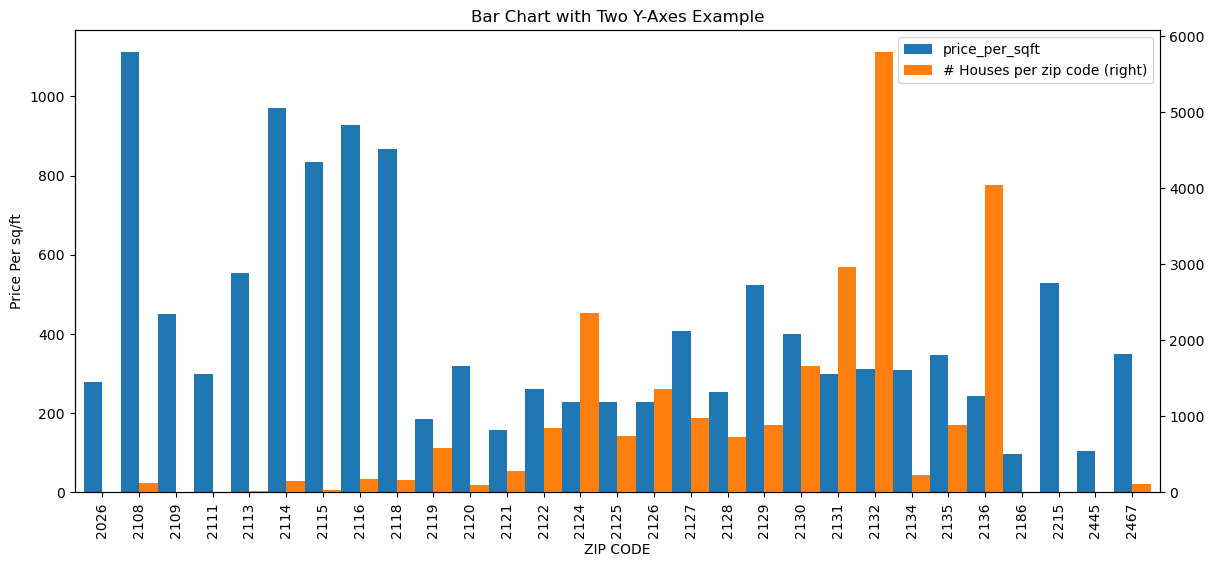

In [330]:

zip_fig = per_sqft_data.plot( kind= "bar" , secondary_y= "# Houses per zip code" ,rot= 90 , width = 1 , align='center',figsize=(14, 6) )
zip_fig.set_xlabel('ZIP CODE')
zip_fig.set_ylabel('Price Per sq/ft')
#zip_fig.set_ylim(0, 1500)
zip_fig.set_title('Bar Chart with Two Y-Axes Example')


plt.show()

In [325]:
count_num_bdrms = df_clean.groupby("R_BDRMS")["AV_TOTAL"].count()
count_num_bdrms.head()


R_BDRMS
1      140
2     3154
3    12941
4     6325
5     1894
Name: AV_TOTAL, dtype: int64

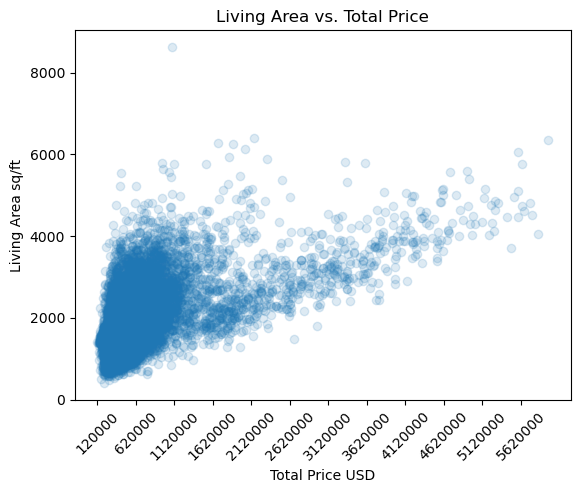

In [326]:
#Assiging variables 
house_value = df_clean["AV_TOTAL"]
living_area = df_clean["LIVING_AREA"]

#using seaborn to generate a scatter plot with alpha option to show the dense section of the plot
areaVsPrice = sns.regplot(x=house_value , y=living_area,scatter_kws={'alpha':0.15}, fit_reg= False)

#sitting labels
areaVsPrice.set(xlabel= "Total Price USD", ylabel="Living Area sq/ft")

#defining the start and end in the x-axis by using the min and max
areaVsPrice.set_xticks(np.arange(int(house_value.min()), int(house_value.max()), 500000))
areaVsPrice.set_xticklabels(np.arange(int(house_value.min() - 1000), int(house_value.max()), 500000), rotation=45)

#setting the title
areaVsPrice.set_title("Living Area vs. Total Price")


plt.show()


In [327]:
# #using seaborn to generate a scatter plot with alpha option to show the dense section of the plot
# sns.regplot(x=df_1800_1850["AV_TOTAL"] , y=df_1800_1850["LIVING_AREA"],scatter_kws={'alpha':0.15},color="red", fit_reg= False, label="1800-1850")
# sns.regplot(x=df_1850_1900["AV_TOTAL"] , y=df_1850_1900["LIVING_AREA"],scatter_kws={'alpha':0.15},color="yellow", fit_reg= False, label="1800-1850")


# #sitting labels
# plt.xlabel("Total Price USD")
# plt.ylabel("Living Area sq/ft")
# plt.xticks(np.arange(int(df_clean["AV_TOTAL"].min()), int(df_clean["AV_TOTAL"].max()), 500000), rotation=45)
# plt.title("Living Area vs. Total Price")
# plt.legend()
# #defining the start and end in the x-axis by using the min and max

# #setting the title
# plt.title("Living Area vs. Total Price")
# plt.legend()
# plt.show()

In [328]:
# # Create figure and subplots
# fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# # Scatter plot of all houses
# sns.regplot(x=df_clean["AV_TOTAL"], y=df_clean["LIVING_AREA"], scatter_kws={'alpha':0.15}, fit_reg=False, ax=ax1)
# ax1.set_xlabel("Total Price USD")
# ax1.set_ylabel("Living Area sq/ft")
# ax1.set_xticks(np.arange(int(df_clean["AV_TOTAL"].min()), int(df_clean["AV_TOTAL"].max()), 500000))
# ax1.set_xticklabels(np.arange(int(df_clean["AV_TOTAL"].min()), int(df_clean["AV_TOTAL"].max()), 500000), rotation=45)
# ax1.set_title("Living Area vs. Total Price")

# # # Scatter plot of houses built between 1800-1850
# # sns.regplot(x=df_1800_1850["AV_TOTAL"], y=df_1800_1850["LIVING_AREA"], scatter_kws={'alpha':0.15}, color="red", fit_reg=False, ax=ax2)
# # ax2.set_xlabel("Total Price USD")
# # ax2.set_ylabel("Living Area sq/ft")
# # ax2.set_xticks(np.arange(int(df_1800_1850["AV_TOTAL"].min()), int(df_1800_1850["AV_TOTAL"].max()), 500000))
# # ax2.set_xticklabels(np.arange(int(df_1800_1850["AV_TOTAL"].min()), int(df_1800_1850["AV_TOTAL"].max()), 500000), rotation=45)
# # ax2.set_title("Living Area vs. Total Price (1800-1850)")
# # ax2.legend()

# # # Show the plot
# # plt.tight_layout()
# plt.show()